# [SWCON25301] Machine Learning
Teaching Assistant: Suyong Bahk (clapd10@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P1:  Pure Python만을 이용하여 Perceptron 구현 (10점)

### 학습목표
- Perceptron Python class를 직접 구현하면서 NN의 작동방법을 이해한다.
- 머신러닝 모델의 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해하고 설명 할 수 있다.

### 실습내용
Frank Rosenblatt의 classic perceptron binary classication(0 또는 1을 구분하는)을 구현합니다. <br>
여러분은 "Pure" 혹은 "vanilla" Python 함수만을 사용하여 구현해야합니다. 그러므로 시각화를 위한 matplotlib 이외의 패키지는 사용하지마세요.

실습은 다음 순서로 진행됩니다. 학생분들께서는 **<구현>**과 **<작성>**에 해당하는 부분을 수행해주시면 됩니다.

- S1. Perceptron 구현 및 분석
    - 1) 실습에서 사용되는 패키지 import
    - 2) 주어진 데이터셋 loading
    - 3) Perceptron Model 구현 **<구현>**
    - 4) Perceptron Model 학습
    - 5) Perceptron Model 검증
    - 6) Decision Boundary 시각화

<br>

- S2. Discussion **<작성>**

### 점수
- Perceptron model 구현: 각 함수별로 2점


### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## S1.  Perceptron 구현 및 분석

## 1-1) Imports
**수정하지 마세요.** HW1에서는 "pure" python으로만 코드를 작성합니다. `matplotlib`이외의 패키지는 사용하지 않습니다.

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

# Customize the default style
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


## 1-2) Loading the Dataset
**수정하지 마세요.** 

코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

두 개의 class(0, 1)를 갖는 2차원 데이터이며, class0은 -1의 값을 가지고 class1은 1의 값을 가집니다.

In [73]:
# CSV 파일을 읽기
X, y = [], []

with open('csv/dataset.csv', 'r') as f:
    next(f)
    classes = [-1, 1]
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
#         y.append(int(values[-1])
        y.append(classes[int(values[-1])])
        
print(len(X), len(y))
print(y)

100 100
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Dataset Split & Visualization

**수정하지 마세요.** 

Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [74]:
import random


# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

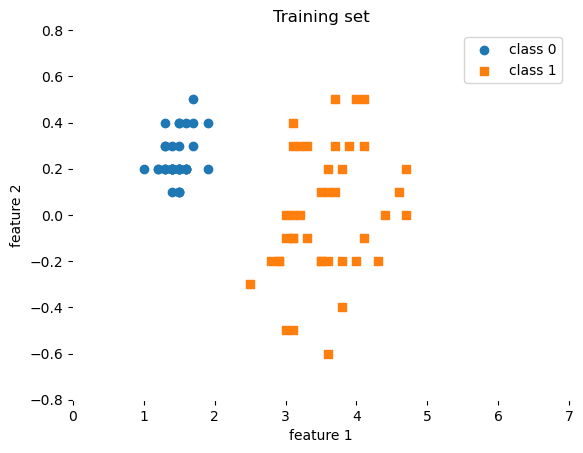

In [75]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 1-3) Perceptron model 구현
이 부분에서는 직접 `Perceptron model`을 구현해 봅니다.

Perceptron model은 생성자, forward, backward, train, evaluation 다섯개 함수로 이루어져 있습니다.
- `__init__` 생성자에서는 Perceptron의 weights와 bias를 초기화합니다.
- `forward`에서는 input을 Perceptron의 가중치를 이용해서 예측을 수행합니다.
- `backward`에서는 Perceptron의 가중치를 학습하기 위한 gradient를 계산합니다.
- `train`에서는 Perceptron을 학습하는 과정으로 `forward`와 `backward`를 차례로 반복하여 Perceptron의 가중치를 업데이트 합니다.
- `evaluation`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다. **(주의: Accuracy 계산)**

아래 `# <your code>` 부분을 채워 넣어서 Perceptron class를 직접 작성하여 구현하세요.

**세부 구현 사항:**
- weights는 랜덤으로 초기화, bias는 0으로 초기화한다.
- activation function은 입력값을 기준으로 `0 초과는 1, 0 이하는 -1`을 출력하게 한다.
- 주의: <U>**Cost Function은 MSE 또는 Cross-Entropy가 아닌 $J(w) = -y(w^Tx)$를 사용**</U>한다. , $x\in Y$는 **틀린 샘플의 집합** 

#### Perceptron
![Perceptron](https://www.researchgate.net/profile/Daniel-Alvarez-34/publication/315788933/figure/fig3/AS:479799241121795@1491404461957/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the.png)
출처: https://www.researchgate.net/figure/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the_fig3_315788933

In [76]:
class Perceptron():
    def __init__(self, num_features):
        self.weights = [random.random() for _ in range(num_features)]  # <your code (1)> initialization
        self.bias = 0.0 # <your code (2)> initialization
        self.lr = 0.1
        
    # 모델의 출력을 반환하는 함수
    def forward(self, x):
        linear = sum([(self.weights[i] * x[i]) for i in range(len(x))]) + self.bias  # <your code (1)> compute weighted sum
        prediction =  1 if linear > 0  else -1  # <your code (2)> apply activation 
        return prediction
        
    # 손실함수에 기반하여 모델의 가중치를 업데이트하기 위한 gradient를 반환하는 함수
    def backward(self, x, y):
        gradient = (-1) * sum([y * x[i] for i in range(len(x))]) # <your code> to compute the gradient
        return gradient
        
    def train(self, x, y, epochs):
        # epochs 만큼 학습
        for e in range(epochs):
            # Each data point (Stochastic learning)
            for i in range(len(y)):
                x_, y_ = x[i], y[i]
                print(x[i], y[i])
                # 오분류 샘플에 대해서만 gradient를 계산하여 모델의 가중치를 업데이트 함
                if y_ != self.forward(x_): 
                    for j in range(len(x_)):
                        gradient = self.backward(x_, y_)# <your code (1)> to compute the gradient
                        # <your code (2)> to update the weights
                        self.weights[j] += self.lr * gradient * (-1)
                    # <your code (3)> to update the bias
                    self.bias += self.lr * gradient * (-1)
                    
    def evaluate(self, x, y):
        # <your code> to compute the prediction accuracy 
        accuracy = sum(1 for i in range(len(y)) if self.forward(x[i]) == y[i]) / len(y)
        return accuracy

## 1-4) Perceptron 학습

작성한 Perceptron을 Trainset을 이용해 5 epoch 학습하고 학습된 weight, bias를 print합니다.

In [81]:
ppn = Perceptron(num_features=2)  # 위에서 구현한 Perceptron 모델 정의
ppn.train(X_train, y_train, 10)    # 10 epoch 학습

# 학습된 모델의 weight, bias 출력
print(ppn.weights)
print(ppn.bias)

[3.5, -0.19999999999999996] 1
[1.6, 0.2] -1
[3.0, 0.0] 1
[4.0, 0.5] 1
[3.5999999999999996, -0.6000000000000001] 1
[3.9000000000000004, 0.2999999999999998] 1
[1.5, 0.2] -1
[4.7, 0.20000000000000018] 1
[3.0999999999999996, 0.3999999999999999] 1
[4.0, -0.19999999999999996] 1
[1.9, 0.2] -1
[3.0999999999999996, 0.0] 1
[1.4, 0.2] -1
[1.5, 0.1] -1
[1.5, 0.2] -1
[1.9, 0.4] -1
[1.0, 0.2] -1
[1.4, 0.3] -1
[1.2, 0.2] -1
[1.4, 0.2] -1
[1.4, 0.1] -1
[4.1, 0.2999999999999998] 1
[3.0, -0.10000000000000009] 1
[1.5, 0.2] -1
[3.0, -0.5] 1
[3.7, 0.10000000000000009] 1
[3.8, 0.20000000000000018] 1
[1.5, 0.4] -1
[1.6, 0.2] -1
[1.2, 0.2] -1
[1.5, 0.2] -1
[3.0999999999999996, 0.2999999999999998] 1
[3.0999999999999996, -0.5] 1
[3.5999999999999996, 0.20000000000000018] 1
[1.7, 0.5] -1
[1.6, 0.4] -1
[1.4, 0.2] -1
[4.4, 0.0] 1
[2.5, -0.30000000000000004] 1
[3.2, 0.2999999999999998] 1
[1.5, 0.2] -1
[1.5, 0.1] -1
[1.3, 0.3] -1
[1.6, 0.2] -1
[2.9000000000000004, -0.19999999999999996] 1
[4.1, -0.10000000000000009] 1

## 1-5) 모델 평가
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [82]:
# Train dataset에서 성능 평가
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [83]:
# Test dataset에서 성능 평가
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## 1-6) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

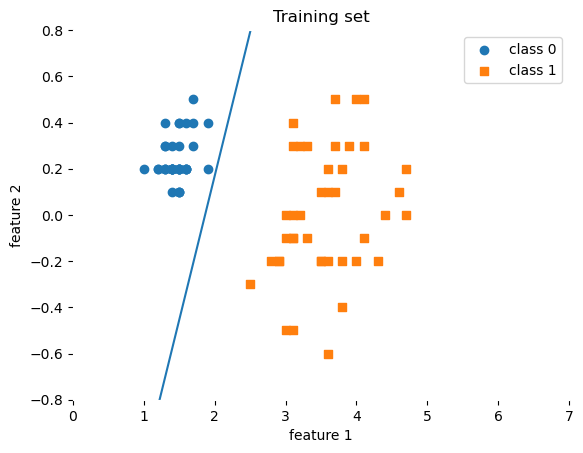

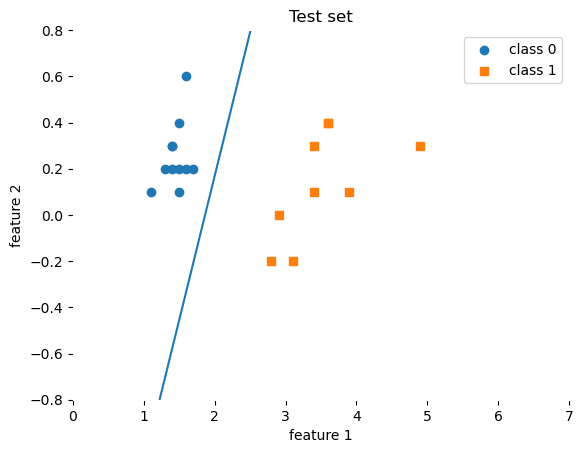

In [84]:
### Train 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

### Test 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == -1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## S2. Discussion

**1) 예시에서 사용된 activation 함수 이외의 어떤 함수가 있는지 찾아보고 설명해보세요.**

[답변작성]
1. Sigmoid Function :
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
(x,y)=(0, 0.5)를 기준으로 점대칭이며, 치역은 0에서 1사이의 값을 갖는다. 로지스틱 회귀 시 activation 함수로 많이 사용된다.


2. ReLU Function
$$
ReLU(x) = \max(0, x)
$$
x = 0을 기준으로 x<0일때는 0을, x>=0 일때는 linear(x)를 반환한다. Gradient가 0 또는 1이기 때문에 학습 속도가 다른 함수들에 비해 빠르다.

**2) Perceptron 하나로 풀 수 없는 문제는 어떤것이 있는지 왜 그런지 설명해보세요.**

[답변작성]

Perceptron 하나로 풀 수 없는 문제들은 Decision Boundary를 직선 하나로 분류할 수 없는 경우이다.
예를 들어 XOR 예시의 경우 (0,0) 과 (1,1)은 Class 0에, (1,0)과 (0,1)은 Class 1에 속하는 경우, 하나의 직선만으로 두 영역을 구분할 수 없다. 이런 경우에는 여러 개의 퍼셉트론인 다층 퍼셉트론이(MLP) 방식을 사용해야 한다.